In [30]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [83]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [139]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [138]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.500000,0,0,7.8292,1,0
1,893,3,0,47.000000,1,0,7.0000,0,1
2,894,2,1,62.000000,0,0,9.6875,1,0
3,895,3,1,27.000000,0,0,8.6625,0,1
4,896,3,0,22.000000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,24.525104,0,0,8.0500,0,1
414,1306,1,0,39.000000,0,0,108.9000,0,0
415,1307,3,1,38.500000,0,0,7.2500,0,1
416,1308,3,1,24.525104,0,0,8.0500,0,1


In [32]:

train.drop("Cabin", inplace=True, axis=1)

In [33]:

train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [34]:
train.drop("Name", inplace=True, axis=1)
train.drop("Ticket", inplace=True, axis=1)
train["Sex"] = train["Sex"].map({'male':1, 'female':0})
embarked = pd.get_dummies(train["Embarked"], drop_first=True)

train = pd.concat([train, embarked], axis=1)

train.drop("Embarked", inplace=True, axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.00,1,0,7.2500,0,1
1,2,1,1,0,38.00,1,0,71.2833,0,0
2,3,1,3,0,26.00,0,0,7.9250,0,1
3,4,1,1,0,35.00,1,0,53.1000,0,1
4,5,0,3,1,35.00,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00,0,0,13.0000,0,1
887,888,1,1,0,19.00,0,0,30.0000,0,1
888,889,0,3,0,21.75,1,2,23.4500,0,1
889,890,1,1,1,26.00,0,0,30.0000,0,0


In [84]:
test['Age'] = test.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
test.drop("Cabin", inplace=True, axis=1)
test.drop("Name", inplace=True, axis=1)
test.drop("Ticket", inplace=True, axis=1)
test["Sex"] = test["Sex"].map({'male':1, 'female':0})
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [85]:
embarked_test = pd.get_dummies(test["Embarked"], drop_first=True)
test = pd.concat([test, embarked_test], axis=1)
test.drop("Embarked", inplace=True, axis=1)

test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.500000,0,0,7.8292,1,0
1,893,3,0,47.000000,1,0,7.0000,0,1
2,894,2,1,62.000000,0,0,9.6875,1,0
3,895,3,1,27.000000,0,0,8.6625,0,1
4,896,3,0,22.000000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,24.525104,0,0,8.0500,0,1
414,1306,1,0,39.000000,0,0,108.9000,0,0
415,1307,3,1,38.500000,0,0,7.2500,0,1
416,1308,3,1,24.525104,0,0,8.0500,0,1


In [8]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

In [35]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,3,1,22.00,1,0,7.2500,0,1
1,2,1,0,38.00,1,0,71.2833,0,0
2,3,3,0,26.00,0,0,7.9250,0,1
3,4,1,0,35.00,1,0,53.1000,0,1
4,5,3,1,35.00,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.00,0,0,13.0000,0,1
887,888,1,0,19.00,0,0,30.0000,0,1
888,889,3,0,21.75,1,2,23.4500,0,1
889,890,1,1,26.00,0,0,30.0000,0,0


In [36]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:

param_grid = {'n_estimators': [20, 100, 200], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],   
              'max_depth': [2, 3, 5, 10]
             }

In [63]:
# make item combination for param_grid dict
import itertools as it
s = sorted(param_grid)
print(s)
combination = it.product(*(param_grid[Name] for Name in s))

['criterion', 'max_depth', 'max_features', 'n_estimators']


In [64]:

combination_list = list(combination)
print(combination_list)

[('entropy', 2, 'log2', 20), ('entropy', 2, 'log2', 100), ('entropy', 2, 'log2', 200), ('entropy', 2, 'sqrt', 20), ('entropy', 2, 'sqrt', 100), ('entropy', 2, 'sqrt', 200), ('entropy', 2, 'auto', 20), ('entropy', 2, 'auto', 100), ('entropy', 2, 'auto', 200), ('entropy', 3, 'log2', 20), ('entropy', 3, 'log2', 100), ('entropy', 3, 'log2', 200), ('entropy', 3, 'sqrt', 20), ('entropy', 3, 'sqrt', 100), ('entropy', 3, 'sqrt', 200), ('entropy', 3, 'auto', 20), ('entropy', 3, 'auto', 100), ('entropy', 3, 'auto', 200), ('entropy', 5, 'log2', 20), ('entropy', 5, 'log2', 100), ('entropy', 5, 'log2', 200), ('entropy', 5, 'sqrt', 20), ('entropy', 5, 'sqrt', 100), ('entropy', 5, 'sqrt', 200), ('entropy', 5, 'auto', 20), ('entropy', 5, 'auto', 100), ('entropy', 5, 'auto', 200), ('entropy', 10, 'log2', 20), ('entropy', 10, 'log2', 100), ('entropy', 10, 'log2', 200), ('entropy', 10, 'sqrt', 20), ('entropy', 10, 'sqrt', 100), ('entropy', 10, 'sqrt', 200), ('entropy', 10, 'auto', 20), ('entropy', 10, 'a

In [57]:

# k-fold with index pair return
def kfold_index(X_train, k):
    if k < 1:
        print('K cannot be smaller than 1')
        return
    else:
        l = X_train.shape[0]
        tail = l % k
        q = l // k
        index = [0]
        output_index = []
        
        for i in range(1, tail):
            index.append(i*q+1)
        for j in range(tail, k+1):
            index.append(j*q+tail)
        for m in range(len(index)-1):
            output_index.append([index[m], index[m+1]])
        
        return output_index

In [59]:
index = kfold_index(X_train, 10)
index

[[0, 90],
 [90, 179],
 [179, 268],
 [268, 357],
 [357, 446],
 [446, 535],
 [535, 624],
 [624, 713],
 [713, 802],
 [802, 891]]

In [60]:
def cv(model, X_train, Y_train, k):
    index = kfold_index(X_train, k)
    
    # train each sub-combination
    auc = []
    for i in range(k):
        
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = Y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = Y_train.drop(X_train.index[index[i][0]:index[i][1]])
        
        model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        # calculate the auc as the evaluation metric
        fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        aa = metrics.auc(fpr, tpr)
        auc.append(aa)
    
    return np.mean(auc)

In [38]:
np.shape(X_train)

(891, 9)

In [39]:
np.shape(Y_train)

(891,)

In [65]:
for i in combination_list:
    rf_clf = RandomForestClassifier(n_estimators = i[3], 
                                    max_features = i[2], 
                                    criterion = i[0],   
                                    max_depth = i[1],
                                    )
    scc = cv(rf_clf, X_train, Y_train, 10)
    score = 0
    
    if scc >= score:
        score = scc
        opt = i

print(score, opt)

0.8639467432722384 ('gini', 10, 'auto', 200)


In [66]:

clf = RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto', n_estimators=200)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [70]:
preds=clf.predict(X_train)
preds_probabilities = clf.predict_proba(X_train)

In [142]:
preds_probabilities

array([[0.8618355 , 0.1381645 ],
       [0.03755556, 0.96244444],
       [0.24573543, 0.75426457],
       ...,
       [0.90083705, 0.09916295],
       [0.22777685, 0.77222315],
       [0.83063031, 0.16936969]])

In [144]:
pred_probs = preds_probabilities[:, 1]
pred_probs

array([0.1381645 , 0.96244444, 0.75426457, 0.97491145, 0.15625592,
       0.10616065, 0.13901312, 0.13649196, 0.80623881, 0.921875  ,
       0.79092834, 0.86370243, 0.12224945, 0.11726429, 0.35852178,
       0.88447209, 0.045     , 0.66531175, 0.30881362, 0.83225837,
       0.20041448, 0.56912823, 0.87133096, 0.65231556, 0.14155728,
       0.69178232, 0.22049308, 0.15347756, 0.97567616, 0.09778966,
       0.15743733, 0.97569444, 0.94146269, 0.21009924, 0.20894868,
       0.1456219 , 0.425377  , 0.09572036, 0.20823744, 0.70406167,
       0.18930261, 0.40908751, 0.13664394, 0.91833333, 0.93910176,
       0.0833228 , 0.08813795, 0.93559746, 0.19396105, 0.2505336 ,
       0.05394709, 0.13608699, 0.95569444, 0.91071043, 0.11393547,
       0.49173356, 0.89009524, 0.1188248 , 0.92255517, 0.03081764,
       0.14939224, 0.97069444, 0.11470402, 0.07308868, 0.1098899 ,
       0.65310655, 0.93861611, 0.14061128, 0.73791559, 0.06850254,
       0.16966005, 0.11232803, 0.08796479, 0.18684178, 0.71268

In [74]:
[fpr, tpr, thr] = roc_curve(Y_train, pred_probs)

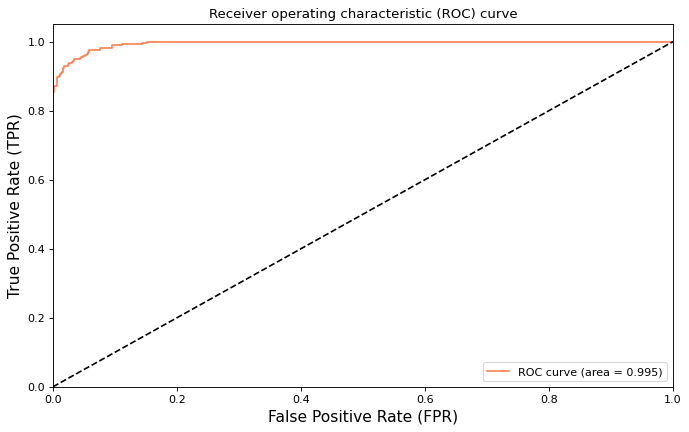

In [75]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("accuracy: %2.3f" % accuracy_score(Y_train, preds))
print("AUC: %2.3f" % auc(fpr, tpr))

accuracy: 0.953
AUC: 0.995


In [79]:
conf_m=confusion_matrix(Y_train, preds)
conf_m

array([[545,   4],
       [ 38, 304]])

In [111]:
test_preds=clf.predict_proba(test)
test_preds

array([[0.8832873 , 0.1167127 ],
       [0.69424423, 0.30575577],
       [0.78855379, 0.21144621],
       [0.74274219, 0.25725781],
       [0.63002742, 0.36997258],
       [0.90795975, 0.09204025],
       [0.68543795, 0.31456205],
       [0.84279991, 0.15720009],
       [0.31516474, 0.68483526],
       [0.93222854, 0.06777146],
       [0.96151054, 0.03848946],
       [0.67121409, 0.32878591],
       [0.05204625, 0.94795375],
       [0.81915626, 0.18084374],
       [0.07670671, 0.92329329],
       [0.15483215, 0.84516785],
       [0.80846946, 0.19153054],
       [0.61155955, 0.38844045],
       [0.74354704, 0.25645296],
       [0.61510976, 0.38489024],
       [0.43640284, 0.56359716],
       [0.46748553, 0.53251447],
       [0.11110142, 0.88889858],
       [0.4869889 , 0.5130111 ],
       [0.10303571, 0.89696429],
       [0.90260605, 0.09739395],
       [0.04028571, 0.95971429],
       [0.6630563 , 0.3369437 ],
       [0.44683622, 0.55316378],
       [0.77144743, 0.22855257],
       [0.

In [108]:
test_y = clf.predict(test)
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.290
Fare,0.191
Age,0.162
PassengerId,0.155
Pclass,0.094
SibSp,0.043
Parch,0.033
S,0.022
Q,0.009


In [112]:
test_survived = pd.DataFrame({'Unsurvived' : test_preds[:,0],'Survived':test_preds[:,1]})
test_survived

,Unsurvived,Survived
0,0.883287,0.116713
1,0.694244,0.305756
2,0.788554,0.211446
3,0.742742,0.257258
4,0.630027,0.369973
...,...,...
413,0.951555,0.048445
414,0.050536,0.949464
415,0.961312,0.038688
416,0.951555,0.048445


In [209]:
final_table = pd.DataFrame({'Actual_survived' : Y_train,'Predicted_probability':pred_probs})
final_table

,Actual_survived,Predicted_probability
0,0,0.138165
1,1,0.962444
2,1,0.754265
3,1,0.974911
4,0,0.156256
...,...,...
886,0,0.067908
887,1,0.923851
888,0,0.099163
889,1,0.772223


In [210]:

def get_prob(x):
    if x["Predicted_probability"] > 0.40:
        return "1"
    else:
        return "0"
final_table.loc[:,"pred_label"] = final_table.apply(get_prob,axis=1)

In [193]:
#final_table['pred_label'].value_counts()

In [211]:
def get_correct(x):
    if int(x["pred_label"])== int(x["Actual_survived"]):
        return 1
    else:
        return 0
final_table.loc[:,"correct"] = final_table.apply(get_correct,axis=1)

In [212]:
final_table['correct'].value_counts()

1    856
0     35
Name: correct, dtype: int64

In [230]:
def get_confusion_matrix(x):
    if int(x["pred_label"])==1 & int(x["Actual_survived"])==1:
        return 'TP'
    if int(x["pred_label"])==0 & int(x["Actual_survived"])==1:
        return 'FN'
    if int(x["pred_label"])==0 & int(x["Actual_survived"])==0:
        return 'TN'
    else:
        return 'FP'
final_table.loc[:,"confusion_matrix"] = final_table.apply(get_confusion_matrix,axis=1)

In [231]:
final_table['confusion_matrix'].value_counts()

TN    562
TP    318
FP     11
Name: confusion_matrix, dtype: int64

In [226]:
final_table.head(30)

,Actual_survived,Predicted_probability,pred_label,correct,confusion_matrix
0,0,0.138165,0,1,TN
1,1,0.962444,1,1,TP
2,1,0.754265,1,1,TP
3,1,0.974911,1,1,TP
4,0,0.156256,0,1,TN
5,0,0.106161,0,1,TN
6,0,0.139013,0,1,TN
7,0,0.136492,0,1,TN
8,1,0.806239,1,1,TP
9,1,0.921875,1,1,TP


In [189]:
#sensitivity = TP/(TP+TN)
accuracy = (tp+tn)/891

In [200]:
(320+36)/891

0.3995510662177329

In [201]:
(318+35)/891

0.3961840628507295